In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')
df

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


In [25]:
df.isnull().sum()

Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64

In [26]:
df.Default.value_counts()

0    1717
1     283
Name: Default, dtype: int64

In [27]:
X = df.drop('Default', axis=1)
y = df['Default']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [30]:
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred),2)}')

Accuracy: 0.95


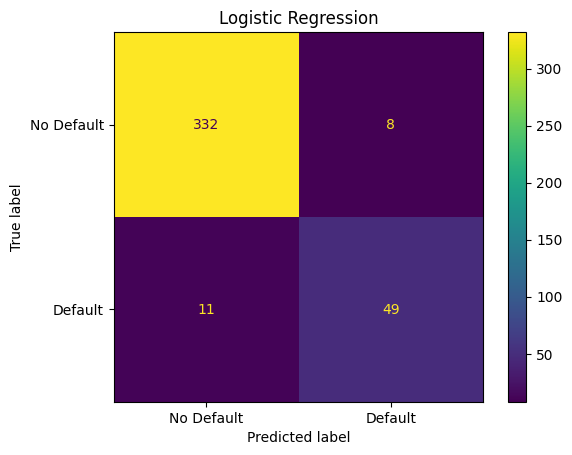

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['No Default','Default'])

cm_plot.plot()

plt.grid(False)
plt.title('Logistic Regression')
plt.show()

In [32]:
print(classification_report(y_test, y_pred, target_names=['No Default','Default']))

              precision    recall  f1-score   support

  No Default       0.97      0.98      0.97       340
     Default       0.86      0.82      0.84        60

    accuracy                           0.95       400
   macro avg       0.91      0.90      0.90       400
weighted avg       0.95      0.95      0.95       400



#### Extra Trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()

In [34]:
et_model.fit(X_train, y_train)
y_pred = et_model.predict(X_test)
print(f'Accuracy: {round(accuracy_score(y_test, y_pred),2)}')

Accuracy: 0.99


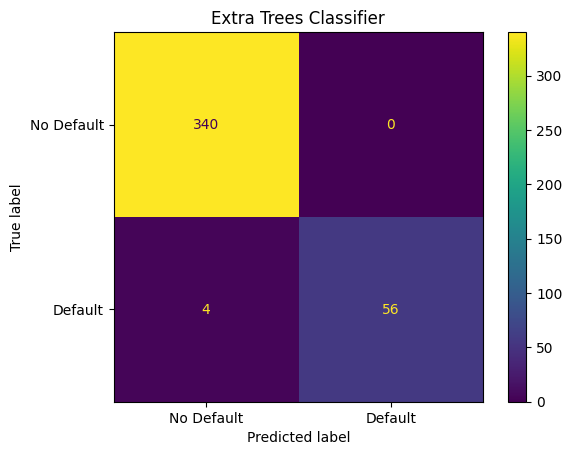

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['No Default','Default'])

cm_plot.plot()

plt.grid(False)
plt.title('Extra Trees Classifier')
plt.show()

In [36]:
print(classification_report(y_test, y_pred, target_names=['No Default','Default']))

              precision    recall  f1-score   support

  No Default       0.99      1.00      0.99       340
     Default       1.00      0.93      0.97        60

    accuracy                           0.99       400
   macro avg       0.99      0.97      0.98       400
weighted avg       0.99      0.99      0.99       400

